In [4]:
# Importing Required Libraries for Analysis
# For Data Manipulations
import numpy as np # library used for working with arrays
import pandas as pd # library used for data manipulation and analysis
import datetime # manipulating date formats

# For Visualisation
import matplotlib.pyplot as plt # for basic plots
plt.style.use('fivethirtyeight') 
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot
from pylab import rcParams 
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# for train Test split
from sklearn.model_selection import TimeSeriesSplit
# Settings
from warnings import filterwarnings
filterwarnings('ignore')
rcParams['figure.figsize'] = 12,4

In [15]:
df=pd.read_csv('dataset_group.csv',parse_dates=['Date'])

In [16]:
df.head()

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose


In [18]:
# Checking the shape of data
print('The shape of dataset is :', df.shape)

The shape of dataset is : (20641, 3)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20641 non-null  datetime64[ns]
 1   Order_id  20641 non-null  int64         
 2   Product   20641 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 483.9+ KB


In [14]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [20]:
df.duplicated().sum()
print('The Duplicated of dataset is :', df.duplicated().sum())

The Duplicated of dataset is : 4730


In [21]:
df.describe()

,Order_id
count,20641.000000
mean,575.986289
std,328.557078
min,1.000000
25%,292.000000
50%,581.000000
75%,862.000000
max,1139.000000


In [71]:
df.nunique()

Order_id    1139
Product       37
dtype: int64

In [74]:
df['Product'].value_counts()

poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
bagels                          573
lunch meat                      573
juice                           570
eggs                            570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
flour                           555
butter                          555
milk                            555
mixes                           554
dishwashing liquid/detergent    551
all- purpose                    551
ketchup                         548
yogurt                          545
individual meals                544
tortillas                   

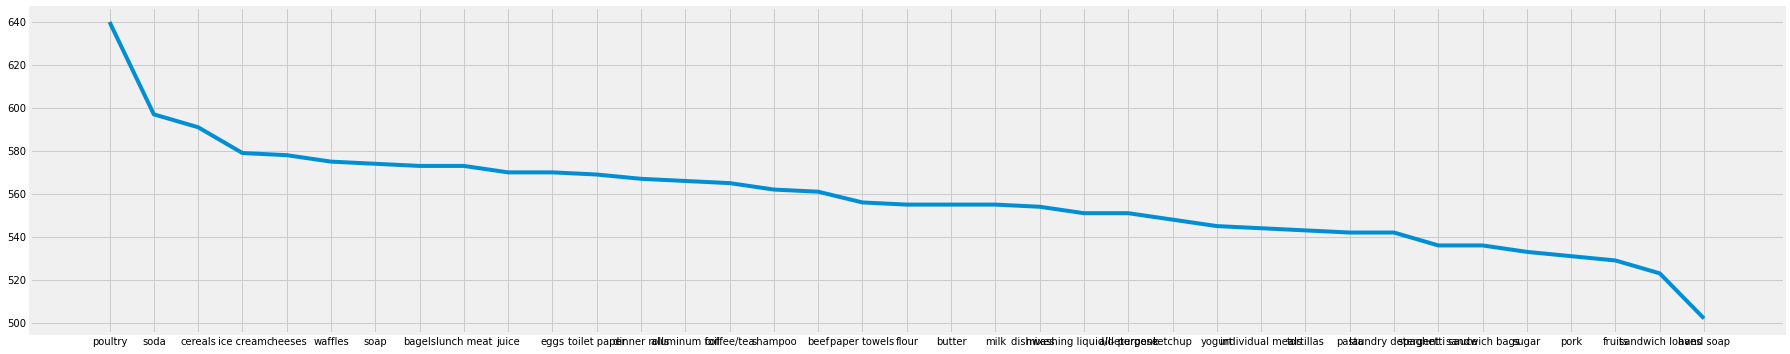

In [80]:
rcParams['figure.figsize'] = 28,6
plt.plot(df['Product'].value_counts())
plt.show()

ValueError: could not convert string to float: 'yogurt'

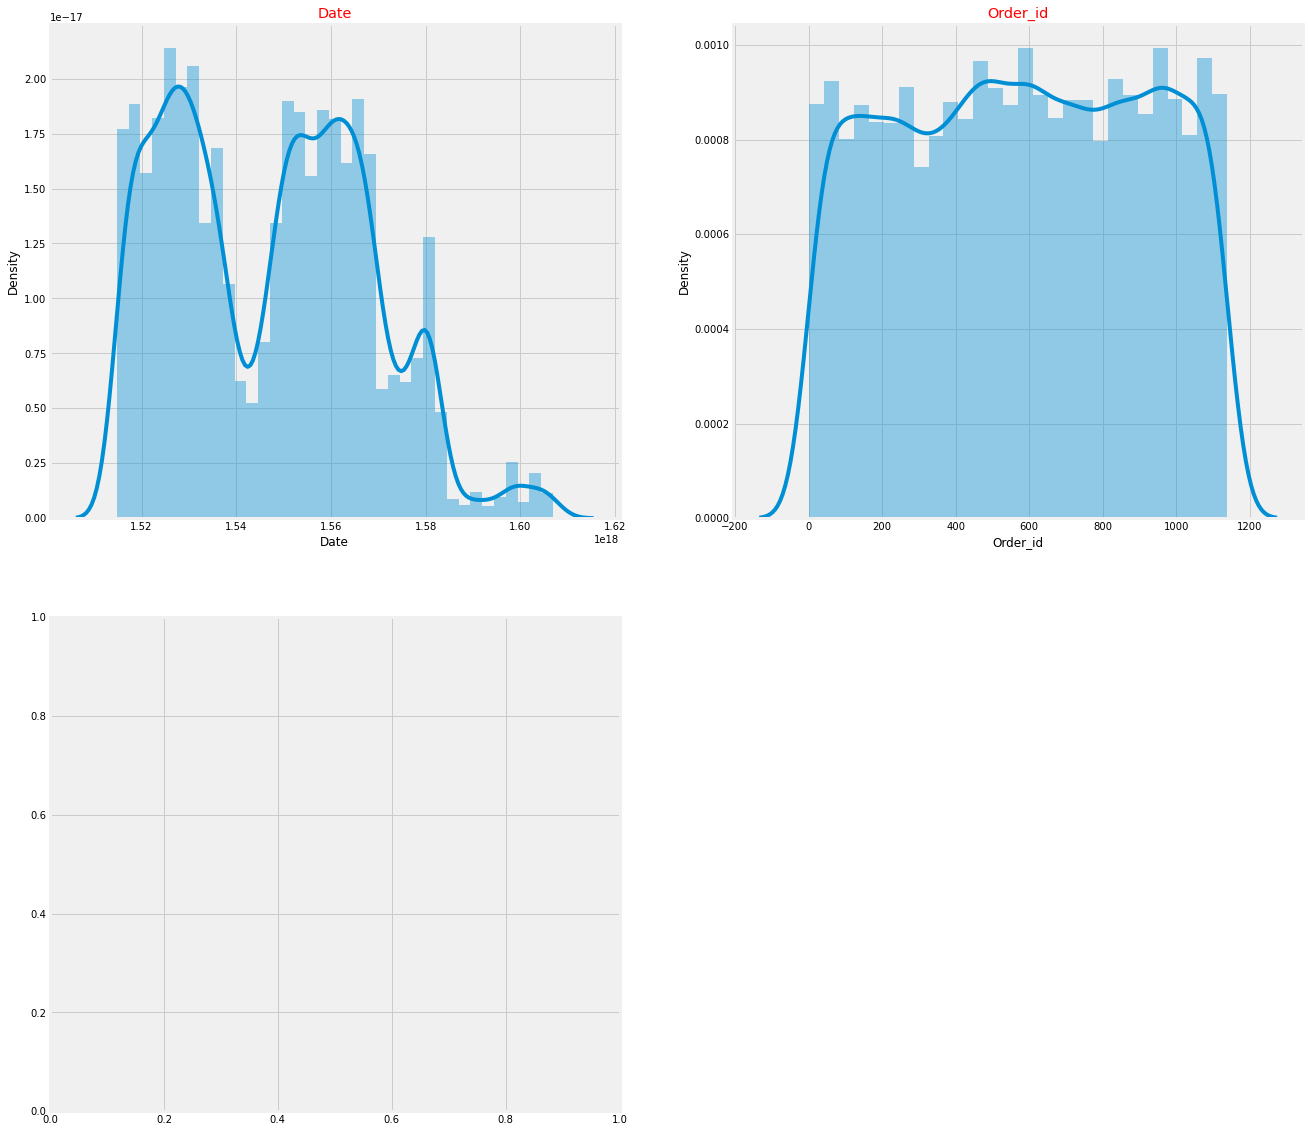

In [29]:
# Data Distribution of each variable
#dfnum=df.select_dtypes(["int64","float64"])
data_plot=df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=True)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show() 
print(df.skew())

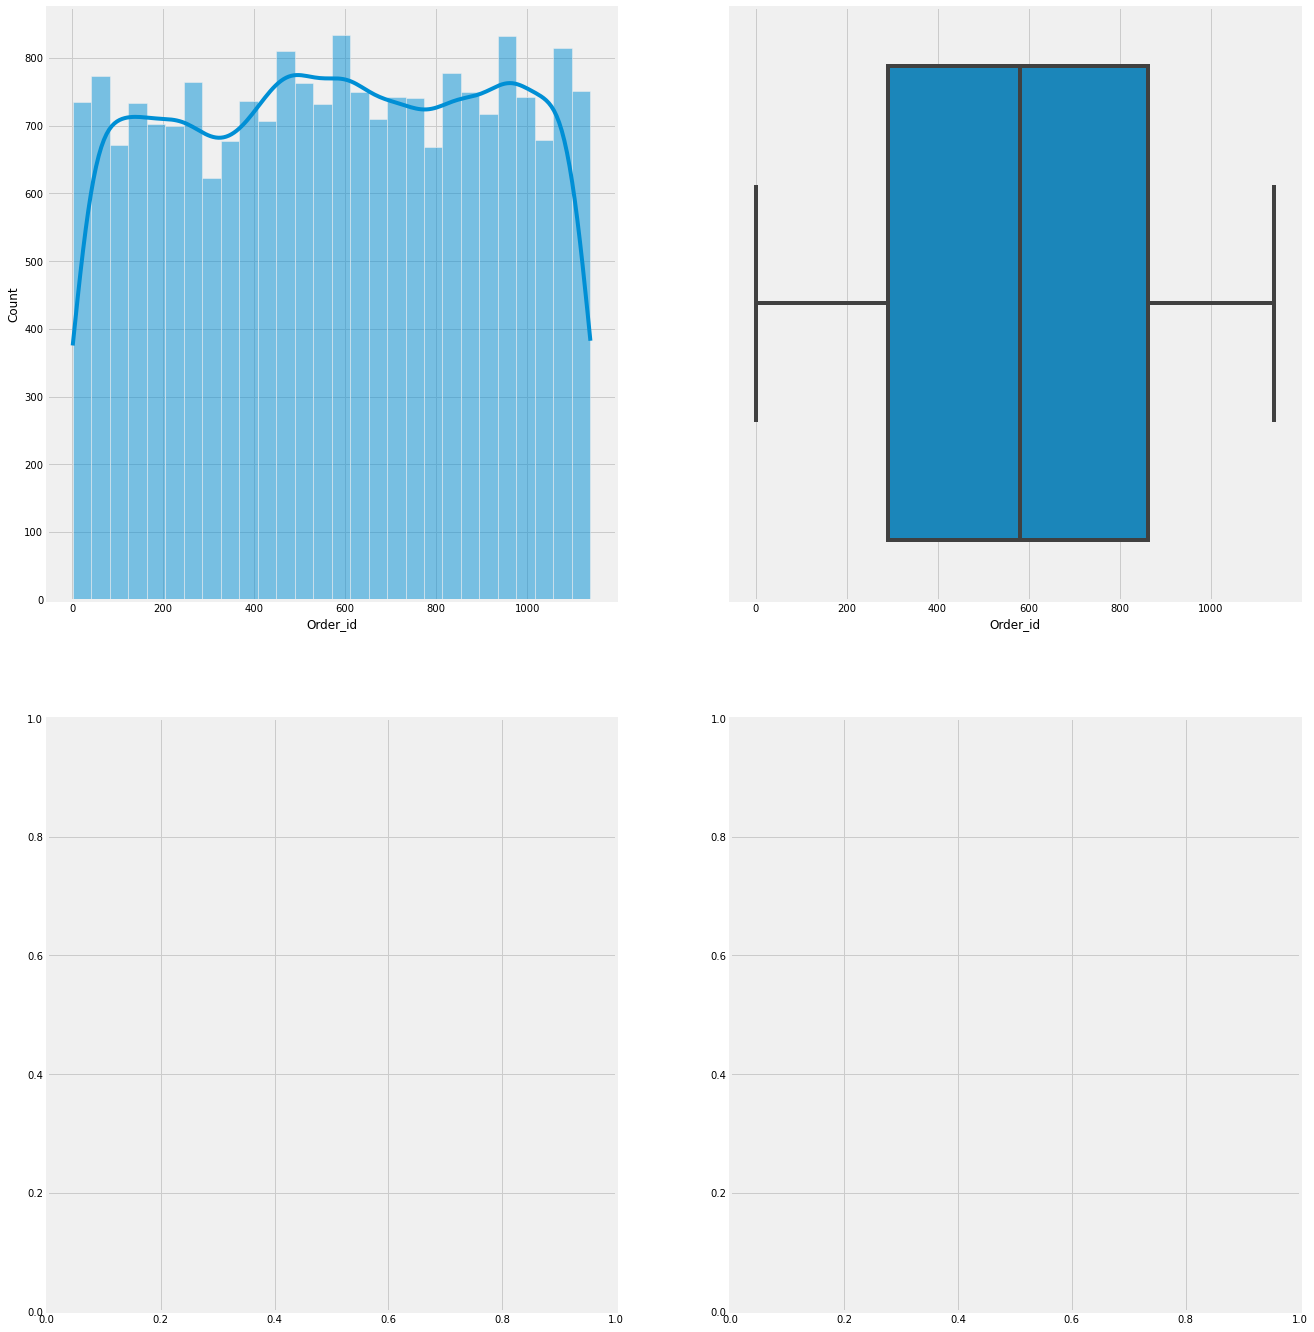

In [25]:
# Univariate Analysis of  numerical data
dfnum=df.select_dtypes(["int64","float64"])
fig, ax= plt.subplots(2,2, figsize=(20,24))
i=0
j=0
for col in dfnum.columns:
    sns.histplot(x=dfnum[col], ax=ax[i][j], kde=True)
    sns.boxplot(x=dfnum[col], ax=ax[i][j+1])
    i=i+1


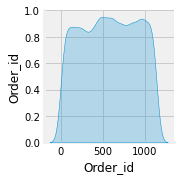

In [26]:
# Bivariate Analysis : Regression line to the  graph to get a better picture
sns.pairplot(data=df,kind='reg', diag_kind='kde')
plt.show()

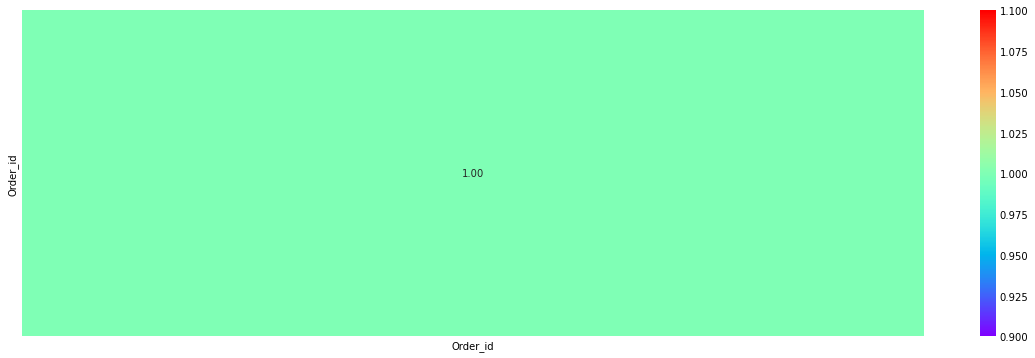

In [27]:
# Multivariate Analysis
corr=df.corr()
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,0:20].corr(),+1))
plt.show();

#### Time Series Analysis

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
df.set_index(keys='Date',inplace=True)
df.head()

,Order_id,Product
Date,,
2018-01-01,1,yogurt
2018-01-01,1,pork
2018-01-01,1,sandwich bags
2018-01-01,1,lunch meat
2018-01-01,1,all- purpose


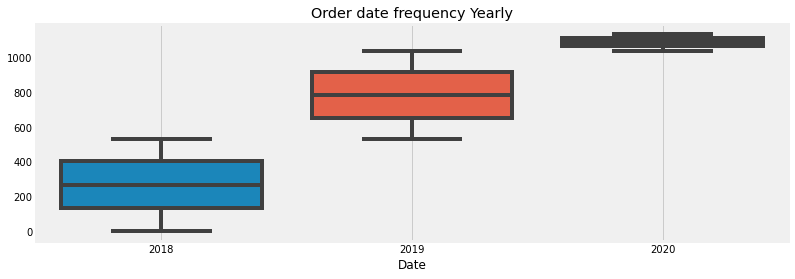

In [35]:
# Yearly box plot
_, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.grid()
plt.title('Order date frequency Yearly');

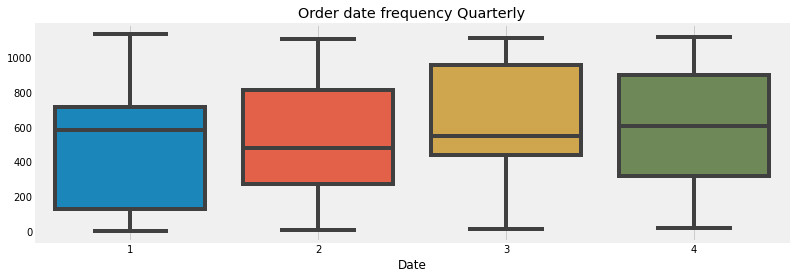

In [36]:
# Quarterly box plot
_, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x=df.index.quarter,y=df.values[:,0],ax=ax)
plt.grid()
plt.title('Order date frequency Quarterly');

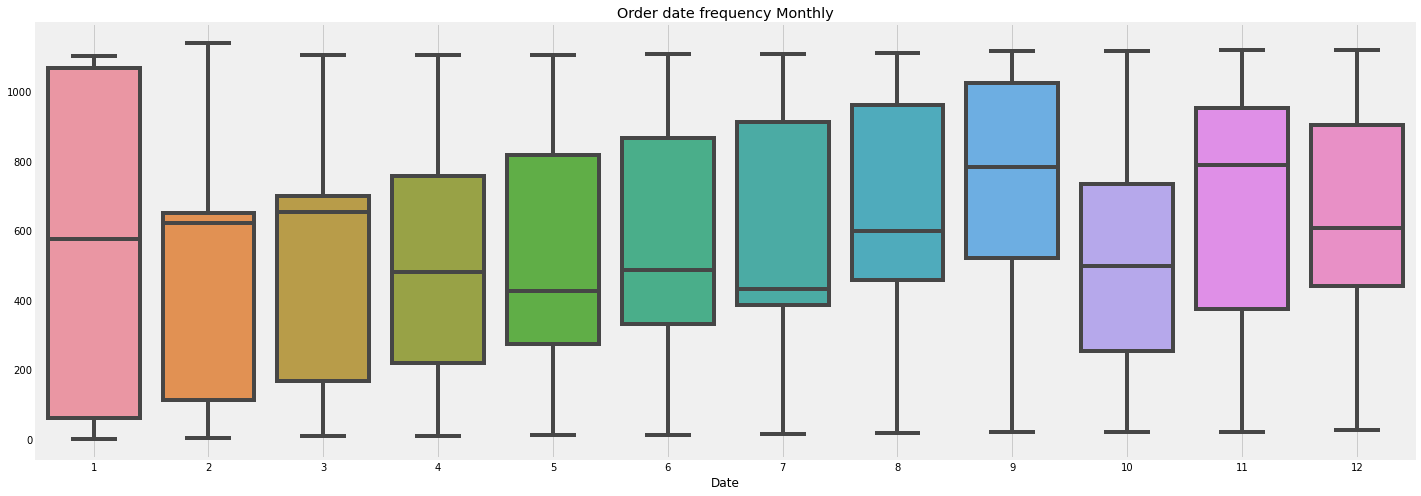

In [37]:
# Monthly box plot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month,y=df.values[:,0],ax=ax)
plt.grid()
plt.title('Order date frequency Monthly');

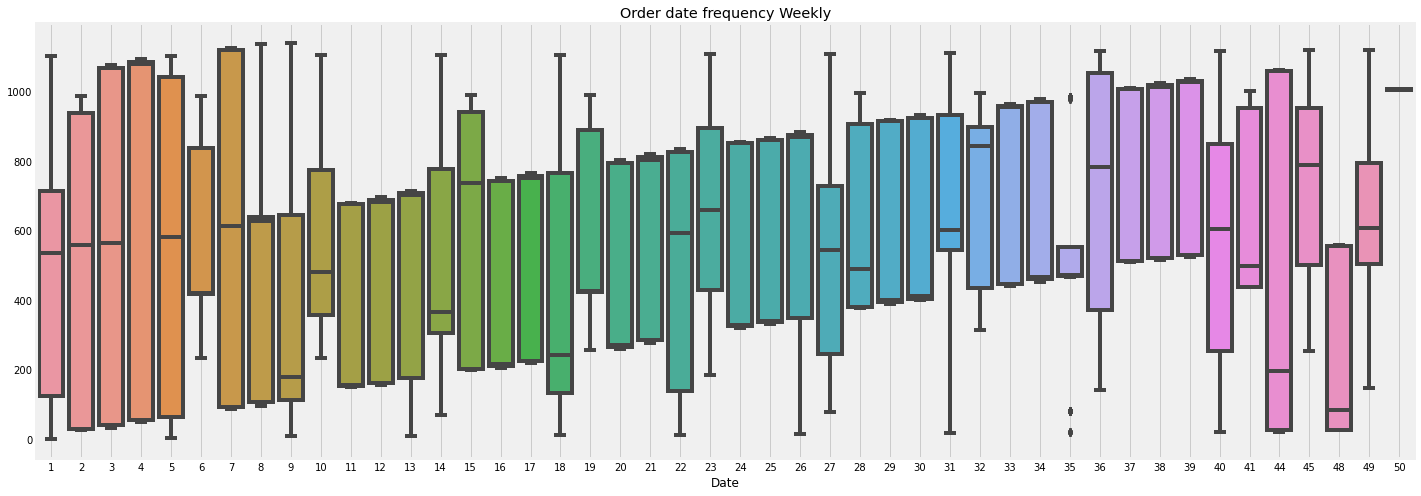

In [34]:
# Week box plot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.week,y=df.values[:,0],ax=ax)
plt.grid()
plt.title('Order date frequency Weekly');

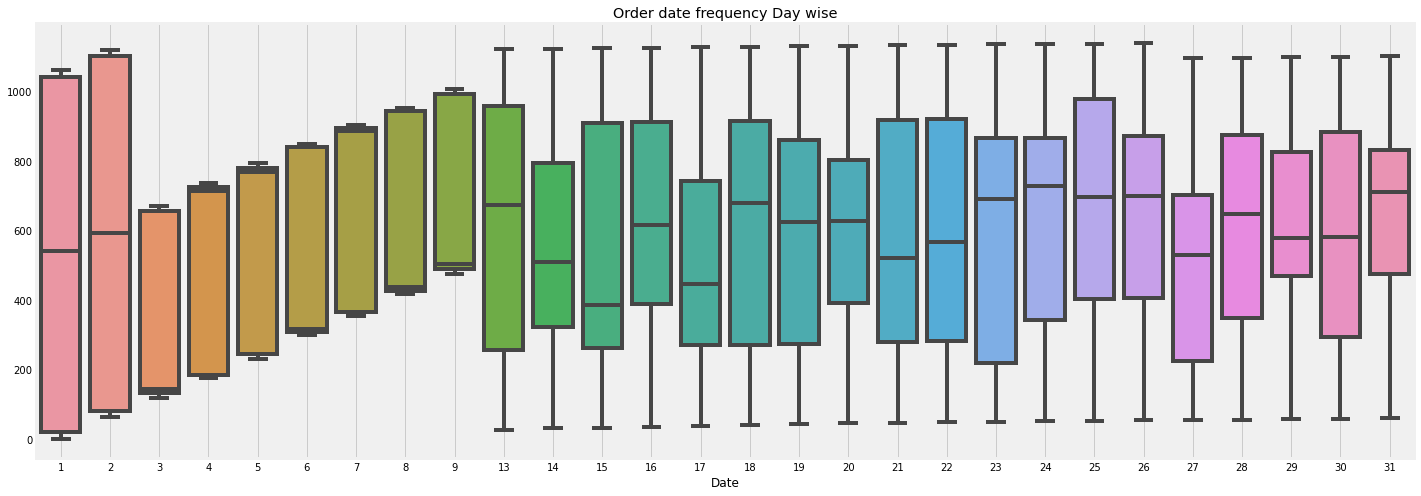

In [33]:
# Day box plot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.day,y=df.values[:,0],ax=ax)
plt.grid()
plt.title('Order date frequency Day wise');

In [66]:
df_monthly = df.resample('M').sum()
df_qtrly =  df.resample('Q').sum()
df_yearly = df.resample('Y').sum()
df_weekly = df.resample('W').sum()
df_daily =  df.resample('D').sum()

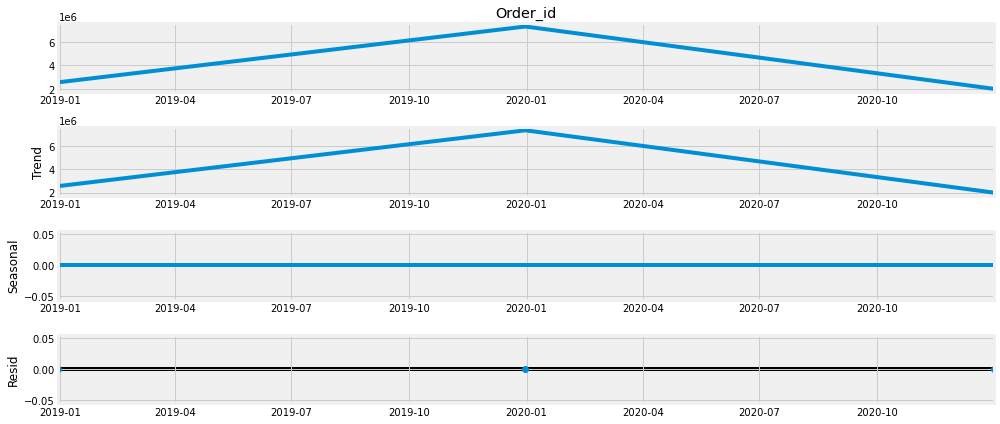

In [50]:
#Decomposition of Yearly sales
rcParams['figure.figsize'] = 14,6
decomposition = seasonal_decompose(df_yearly['Order_id'], model='additive')
decomposition.plot();

#### Insights:
There is trend is sales obeserved from year 2019-01 on steady increasing trend till 2020-10.Decreasing trend after that.
    

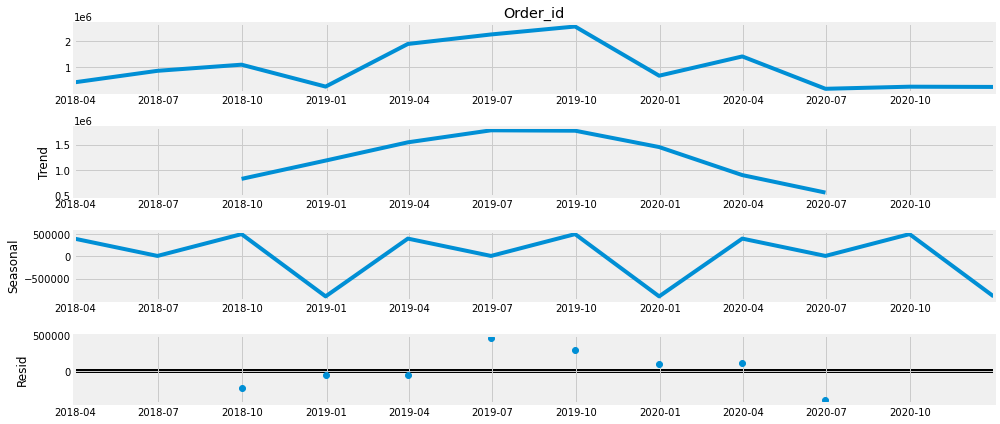

In [52]:
#Decomposition of Qurterly sales
rcParams['figure.figsize'] = 14,6
decomposition = seasonal_decompose(df_qtrly['Order_id'], model='additive')
decomposition.plot();

Increasing Trend in sales can be obeserved from year 2018-10 to 2019-7, whlile on steady till 2019-10 .The decrasing trend till 2020-07.

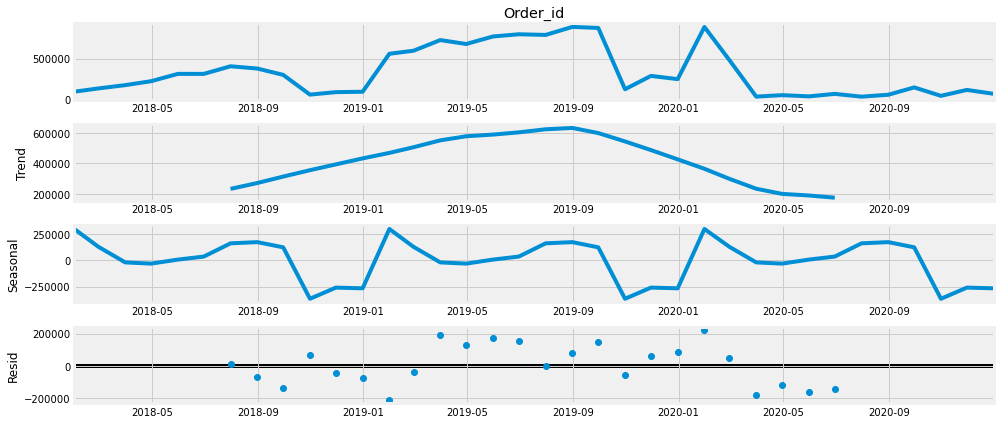

In [54]:
#Decomposition of Monthly sales
rcParams['figure.figsize'] = 14,6
decomposition = seasonal_decompose(df_monthly['Order_id'], model='additive')
decomposition.plot();

Same trend but Seasonlity are now granular through out the year.

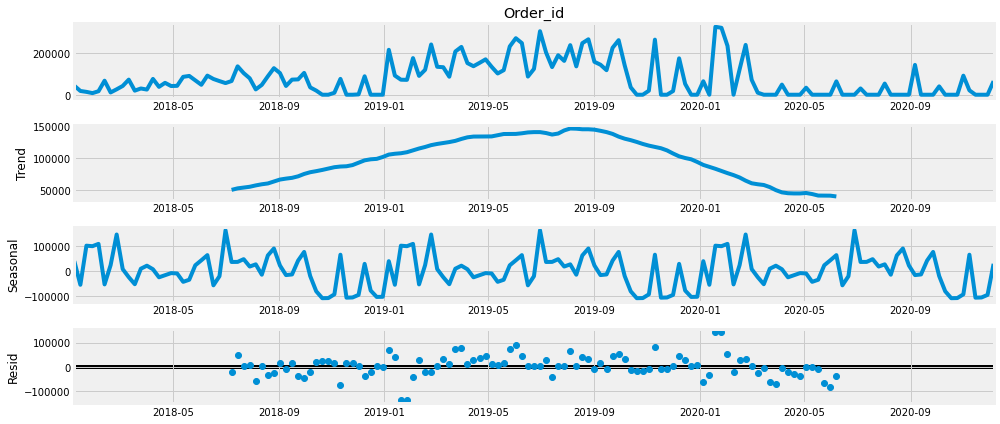

In [55]:
#Decomposition of Weekly sales
rcParams['figure.figsize'] = 14,6
decomposition = seasonal_decompose(df_weekly['Order_id'], model='additive')
decomposition.plot();

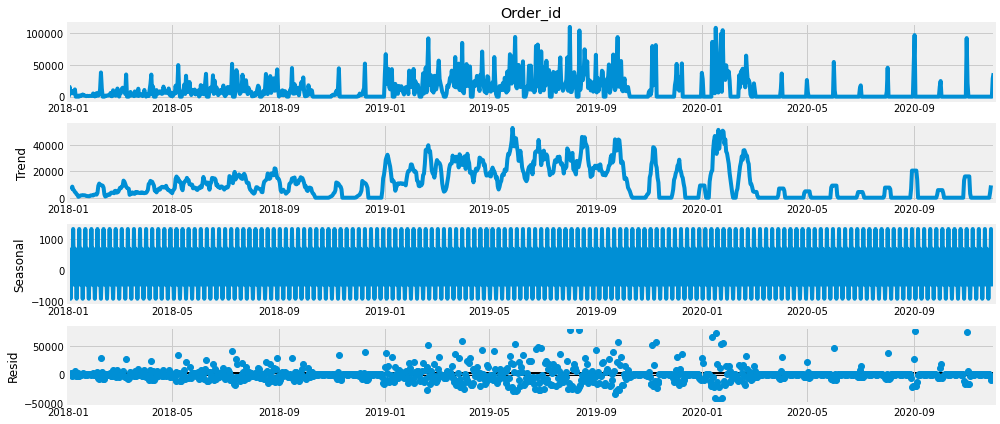

In [58]:
#Decomposition of Daily sales
rcParams['figure.figsize'] = 14,6
decomposition = seasonal_decompose(df_daily['Order_id'], model='additive')
decomposition.plot();

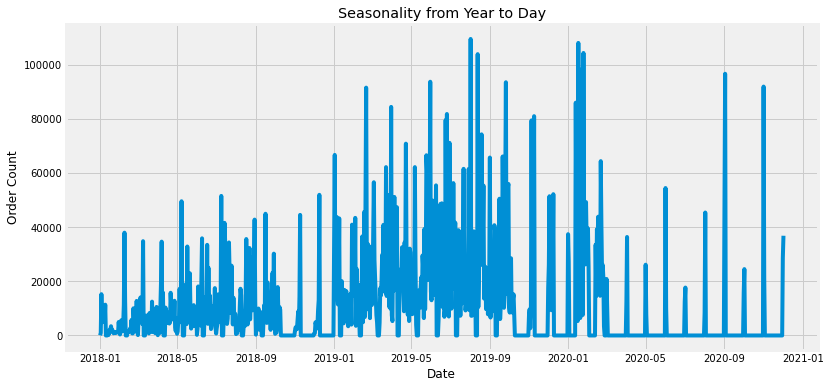

In [61]:
#Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['Order_id'])
plt.title('Seasonality from Year to Day')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.show()

#### MARKET BASKET ANALYSIS
Market basket analysis is a data mining technique used to discover relationships between products that are frequently purchased together in a transactional dataset. Association rules are derived from this analysis, which provide insights into the co-occurrence and dependencies among items.

Association rules consist of two parts: antecedent (the item(s) that appear in the left-hand side of the rule) and consequent (the item(s) that appear in the right-hand side of the rule). The rules are represented as "If antecedent, then consequent" and are typically measured using support, confidence, and lift metrics:

Support: Measures the frequency or proportion of transactions that contain both the antecedent and consequent items. It indicates the popularity of the rule.

Confidence: Indicates the likelihood that the consequent item(s) will be purchased when the antecedent item(s) are already in the basket. It measures the conditional probability of the rule.

Lift: Compares the observed support of a rule to the expected support if the items were independent of each other. Lift greater than 1 indicates a positive association between the items.

Relevance of Association Rules in Market Basket Analysis:

Cross-selling and product placement: Association rules help identify items that are frequently purchased together. This information can be used for cross-selling and product placement strategies. For example, if customers who buy coffee often buy sugar as well, placing these items together in a store can increase sales.

Pricing and promotions: By identifying associations between products, businesses can develop pricing strategies and promotional campaigns. For example, offering a discount on bread may increase the likelihood of customers also purchasing butter.

Inventory management: Understanding item associations can help optimize inventory management. It allows businesses to ensure sufficient stock of related items and streamline the supply chain process.

Market segmentation: Association rules can be used to segment customers based on their purchasing behavior. This helps in targeted marketing efforts and personalization of product recommendations.

Market basket optimization: By analyzing association rules, businesses can identify popular item combinations and optimize the arrangement of products on shelves or in online stores to enhance customer experience and increase sales.

Overall, market basket analysis and association rules provide valuable insights into customer behavior and product relationships, enabling businesses to make data-driven decisions, improve customer satisfaction, and drive revenue growth

#### Association Rule
Association rule mining is a data mining technique used to discover interesting relationships or patterns in transactional or market basket data. It aims to uncover associations between items that are frequently co-occurring in the same transactions or events. These associations are represented in the form of "if-then" rules, where one set of items (antecedent) implies the presence of another set of items (consequent) in the same transaction.

The strength of an association rule is measured using several metrics, including support, confidence, and lift:

Support: Support measures the frequency of a particular itemset or rule in the dataset. It represents the proportion of transactions that contain both the antecedent and the consequent. A higher support indicates a stronger association between the items.

Confidence: Confidence measures the conditional probability of finding the consequent items in a transaction given that the antecedent items are present. It represents the likelihood of the consequent items being purchased when the antecedent items are purchased. Higher confidence values indicate stronger relationships between the items.

Lift: Lift measures the strength of association between the antecedent and the consequent, taking into account the support of both itemsets. It compares the observed support of the rule to the expected support if the items were independent. A lift value greater than 1 indicates a positive association, while a value less than 1 indicates a negative or unlikely association.

Association rules are considered relevant if they meet certain predefined thresholds for support, confidence, and lift. The choice of these thresholds depends on the specific application and the desired level of significance. High support indicates that the rule is based on a substantial number of transactions, high confidence indicates a strong relationship between the items, and lift indicates the strength of the association beyond what would be expected by chance.

Relevance in association rule mining refers to the usefulness or significance of the discovered rules in the context of the problem at hand. Relevant rules can provide valuable insights for various applications such as market basket analysis, cross-selling, recommendation systems, and targeted marketing campaigns. By analyzing the association rules, businesses can make informed decisions on product placement, promotions, and customer segmentation to optimize their strategies and improve overall business performance.

    ----------------------------------------------------------

Association rule mining is a technique used in data mining to discover a correlation between two or more items in a dataset. It is used to identify patterns or relationships between items that occur frequently together in a transactional database. The association rule is an implication expression of the form X -> Y, where X and Y are any two itemsets. The rule evaluation metrics include support(s), confidence and lift12.

Relevance is the degree to which something is related or useful to what is happening or being talked about. In the context of association rule mining, relevance refers to the usefulness of the discovered association rules for a given application





#### Support:
Support measures the frequency or occurrence of a particular itemset or rule in the dataset.
It is calculated as the number of transactions containing both the antecedent and consequent items divided by the total number of transactions.
The support value represents the proportion or percentage of transactions in which the rule or itemset appears.
Higher support values indicate a stronger presence of the rule or itemset in the dataset.
Confidence:

#### Confidence
measures the conditional probability of finding the consequent items in a transaction given that the antecedent items are present.
It is calculated as the number of transactions containing both the antecedent and consequent items divided by the number of transactions containing the antecedent items.
The confidence value ranges between 0 and 1, where 1 represents a perfect implication.
Higher confidence values indicate a stronger relationship between the antecedent and consequent items in the rule.
Lift:

#### Lift
is a measure of the strength of association between the antecedent and consequent items, taking into account the support of both itemsets.
It is calculated as the ratio of the observed support of the rule to the expected support if the antecedent and consequent items were independent.
A lift value of 1 implies independence, meaning there is no association between the items.
Lift values greater than 1 indicate a positive association, suggesting that the presence of the antecedent items increases the likelihood of the consequent items being purchased.
Lift values less than 1 indicate a negative or unlikely association, suggesting that the presence of the antecedent items decreases the likelihood of the consequent items being purchased.
Higher lift values indicate stronger associations beyond what would be expected by chance.
Support, confidence, and lift are interrelated metrics used to evaluate the strength and significance of association rules in market basket analysis. They help in identifying interesting and meaningful relationships between items and determining which rules are most relevant for decision-making. By setting appropriate thresholds for these metrics, analysts can filter and focus on the most significant and actionable rules that meet their specific requirements and objectives.








#### Threshold values for support and confidence play a crucial role in determining the significance and usefulness of discovered association rules. Support and confidence are two common measures used to quantify the strength and reliability of associations between items in a dataset.

Support:
Support refers to the frequency or occurrence of an itemset in a dataset. It measures how frequently a particular itemset appears in the dataset relative to the total number of transactions or observations. The support of an itemset is calculated by dividing the number of transactions containing that itemset by the total number of transactions in the dataset.
Threshold values for support are used to filter out infrequent or less significant itemsets. Setting a higher support threshold means that only itemsets with a relatively high occurrence in the dataset will be considered, while lower support thresholds allow for more inclusion of less frequent itemsets. Choosing an appropriate support threshold depends on the specific application and the desired level of granularity in the discovered rules. Higher support thresholds tend to yield fewer but more reliable rules, whereas lower thresholds can lead to a larger number of rules, including more specific and possibly less reliable associations.

Confidence:
Confidence measures the strength of an association rule by calculating the conditional probability of the consequent item(s) given the antecedent item(s). It is calculated by dividing the support of the itemset containing both the antecedent and consequent by the support of the antecedent alone.
Threshold values for confidence are used to control the reliability of the discovered association rules. By setting a minimum confidence threshold, you can filter out weak or less significant rules. Higher confidence thresholds ensure that the discovered rules have a stronger statistical relationship between the antecedent and consequent, while lower thresholds allow for more inclusion of potentially weaker associations. It's important to note that the confidence measure is limited to assessing the strength of the rule within the observed data and may not necessarily imply a causal relationship.

Determining suitable threshold values for support and confidence involves a trade-off between rule quality and quantity. Higher thresholds result in fewer but more reliable rules, whereas lower thresholds generate a larger number of rules, which may include both significant and less significant associations. The choice of threshold values is influenced by the specific requirements of the analysis, domain knowledge, and the desired balance between precision and recall in the rule discovery process.

It's worth mentioning that the selection of appropriate threshold values is often an iterative process, where analysts adjust the thresholds, analyze the generated rules, and refine the values based on their relevance and usefulness in the given context.





